In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

(a) load data  
(b) treat school name as an column of indices instead of features

In [3]:
flc = 'data/'
fname = flc + 'College.csv'
# treated school name as indices
X = pd.read_csv(fname, sep = ',', index_col = 0)

(c) - i view basic summary info of each column, including qualitative features

In [4]:
X.describe(include = 'all')

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,NaN,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,NaN,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,NaN,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,NaN,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,NaN,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000


(c) - ii scatter plot matrix of first 10 columns

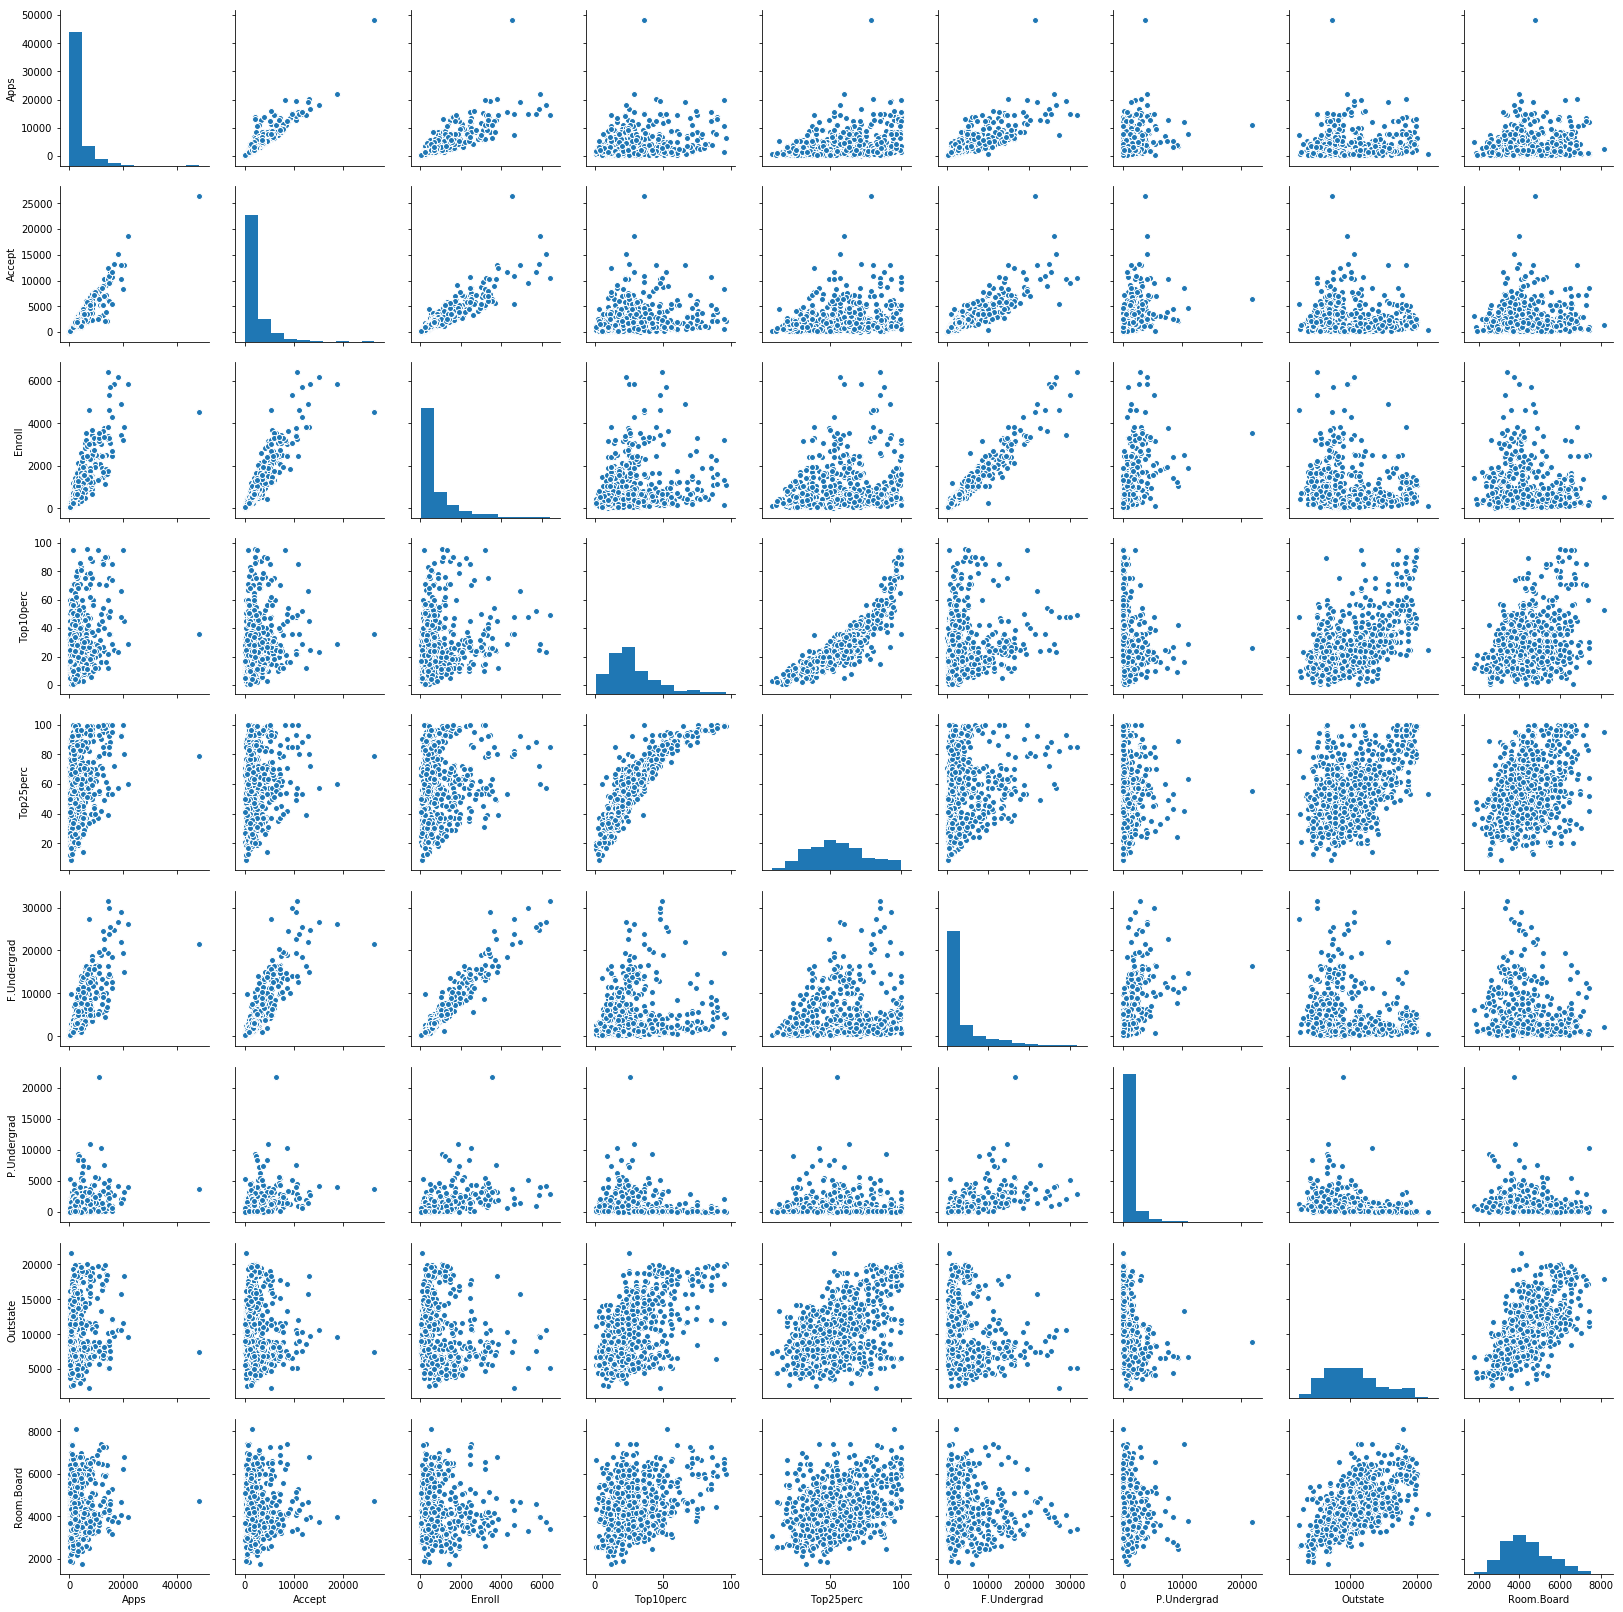

In [5]:
sns.pairplot(X.iloc[:, :10])

(c) - iii side-by-side boxplots of Outstate versus Private

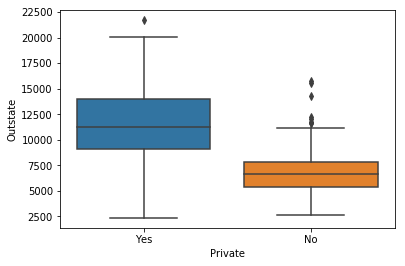

In [6]:
sns.boxplot(x = 'Private', y = 'Outstate', data = X)

(c) - iv Create a new qualitative variable, Elite, by binning the Top10perc variable. Universities are divided into two groups based on whether or not the proportion of students coming from the top 10% of their high school classes exceeds 50 %: exceed -> elite; otherwise -> no  
* show summary of Elite column 
* side-by-side boxplots of Outstate versus Elite

In [7]:
Nrow, Ncol = X.shape
Elite = pd.DataFrame(['yes'] * Nrow, columns = ['Elite'], index = X.index)
X = pd.concat([X, Elite], axis = 1)
X.loc[X.Top10perc <= 50, 'Elite'] = 'No'

In [8]:
X.Elite.describe()

count     777
unique      2
top        No
freq      699
Name: Elite, dtype: object

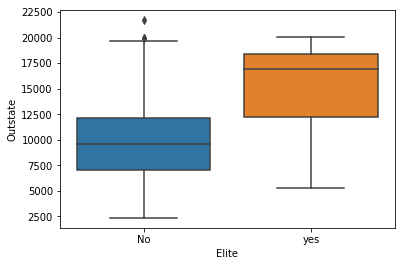

In [9]:
sns.boxplot(x = 'Elite', y = 'Outstate', data = X)

(c) - v produce some histograms with differing numbers of bins for a few of the quantitative variables

/Users/pinqingkan/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/pinqingkan/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/pinqingkan/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/pinqingkan/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/pinqingkan/an

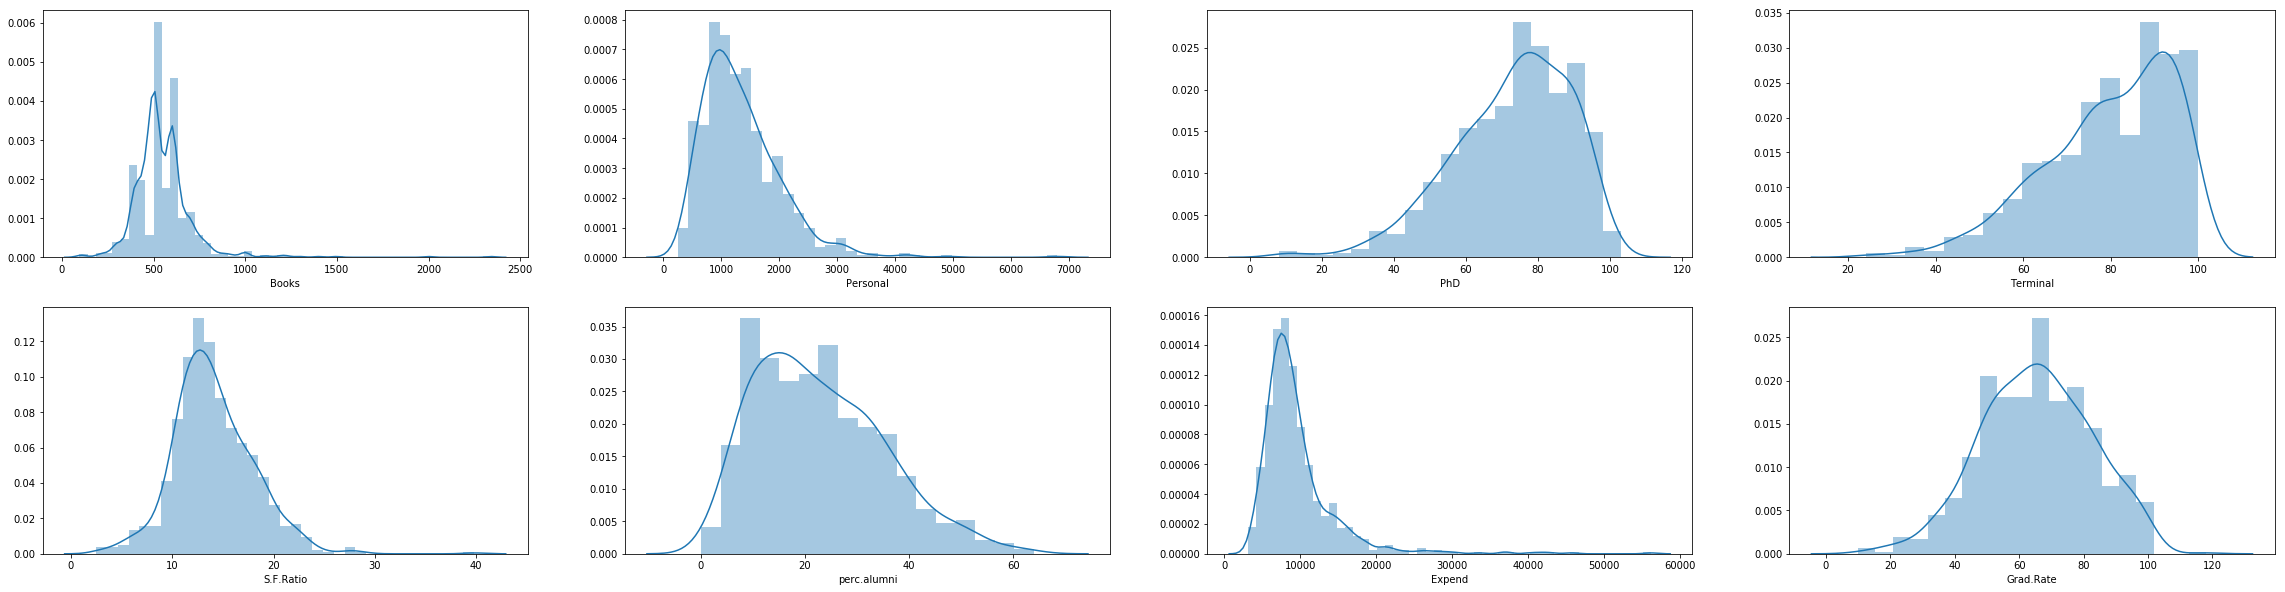

In [10]:
plt.figure(figsize = (40, 10))
cnt = 0
for icol in range(10, Ncol):
    cnt += 1
    plt.subplot(2, 4, cnt)
    sns.distplot(X.iloc[:, icol])

(c) - vi Continue exploring the data, and provide a brief summary of what you discover

In [11]:
# explore the influence of normalization
import sklearn.preprocessing as prep
X2 = prep.StandardScaler().fit_transform(X.iloc[:, 1:-1])
X2 = pd.DataFrame(X2, columns = X.columns[1:-1])
X2 = pd.concat([X.iloc[:, 0].reset_index(drop = True), X2, X.iloc[:, -1].reset_index(drop = True)], axis = 1)

In [12]:
from pandas.plotting import parallel_coordinates as parcor

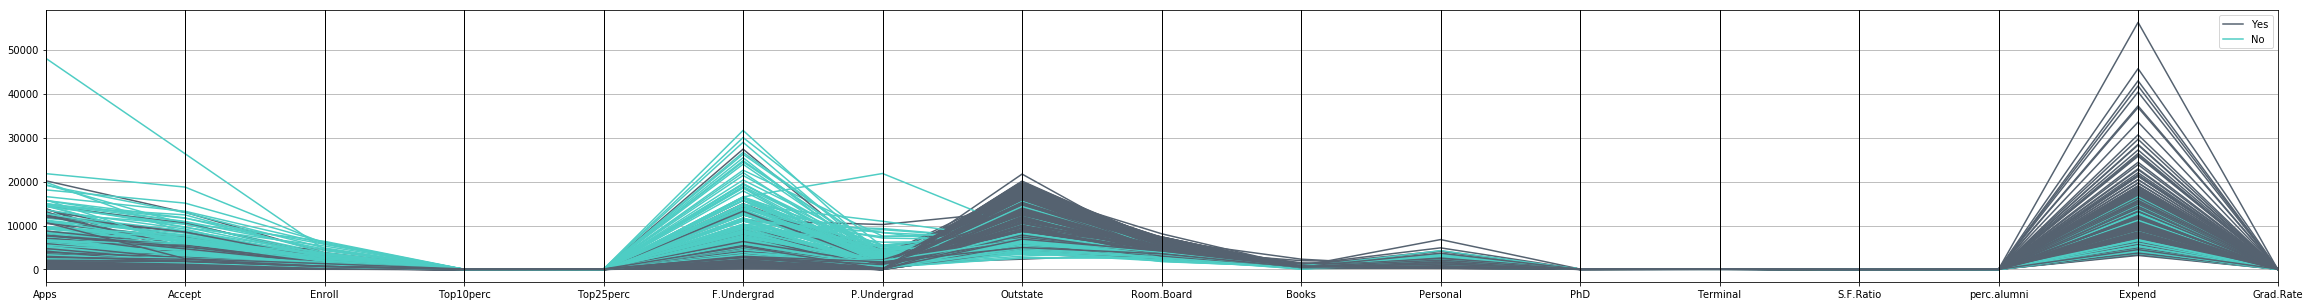

In [13]:
plt.figure(figsize = (40, 5))
parcor(X.iloc[:, :-1], 'Private', color = ('#556270', '#4ECDC4'))
plt.show()

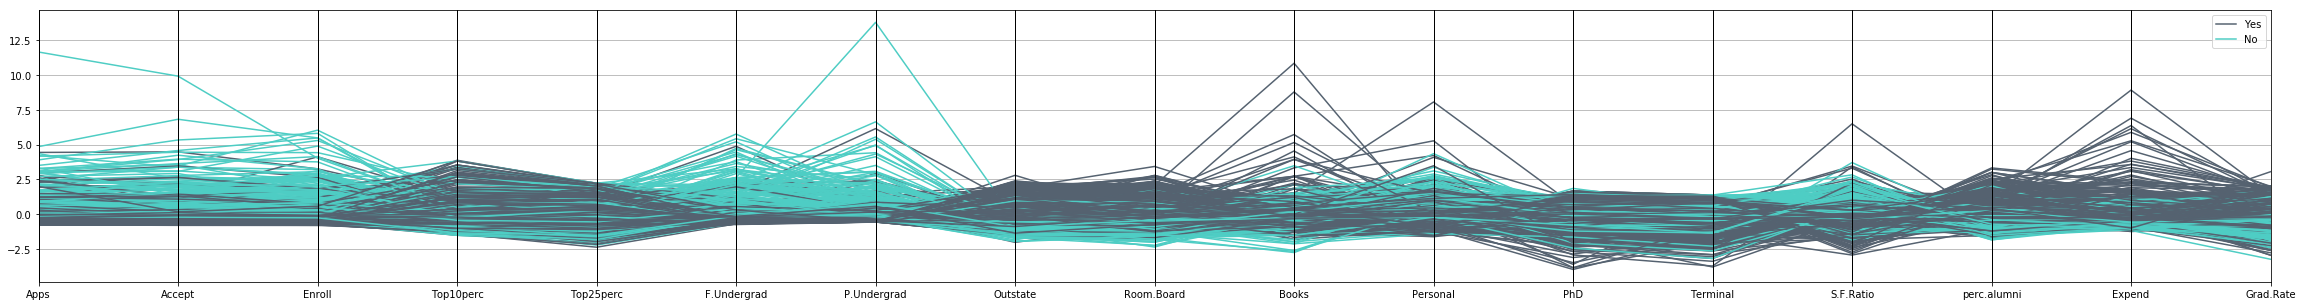

In [14]:
plt.figure(figsize = (40, 5))
parcor(X2.iloc[:, :-1], 'Private', color = ('#556270', '#4ECDC4'))
plt.show()

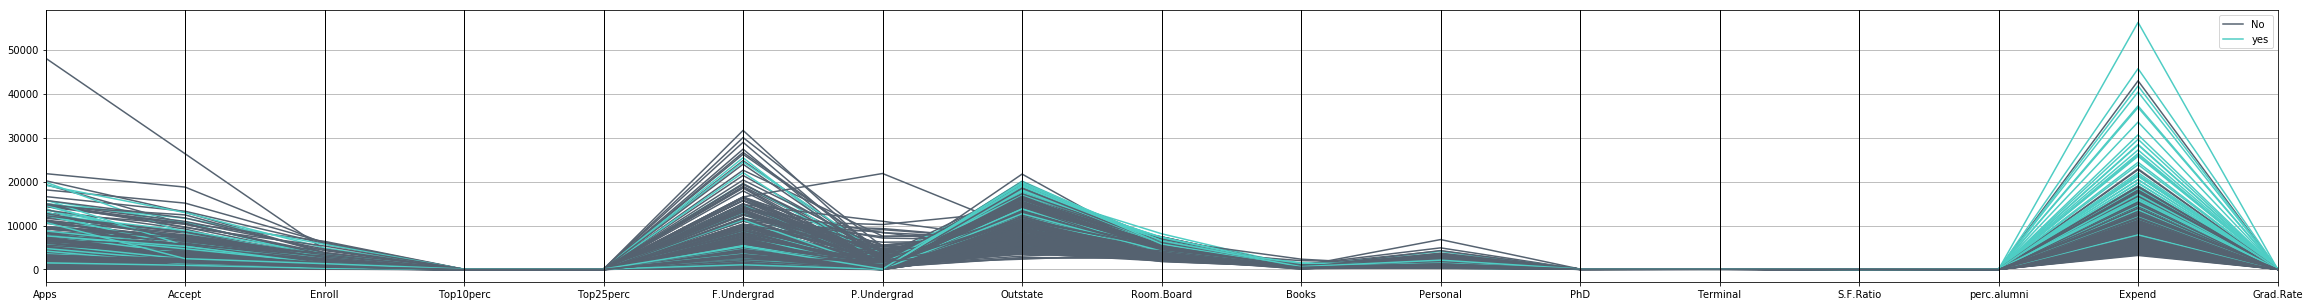

In [15]:
plt.figure(figsize = (40, 5))
parcor(X.iloc[:, 1:], 'Elite', color = ('#556270', '#4ECDC4'))
plt.show()

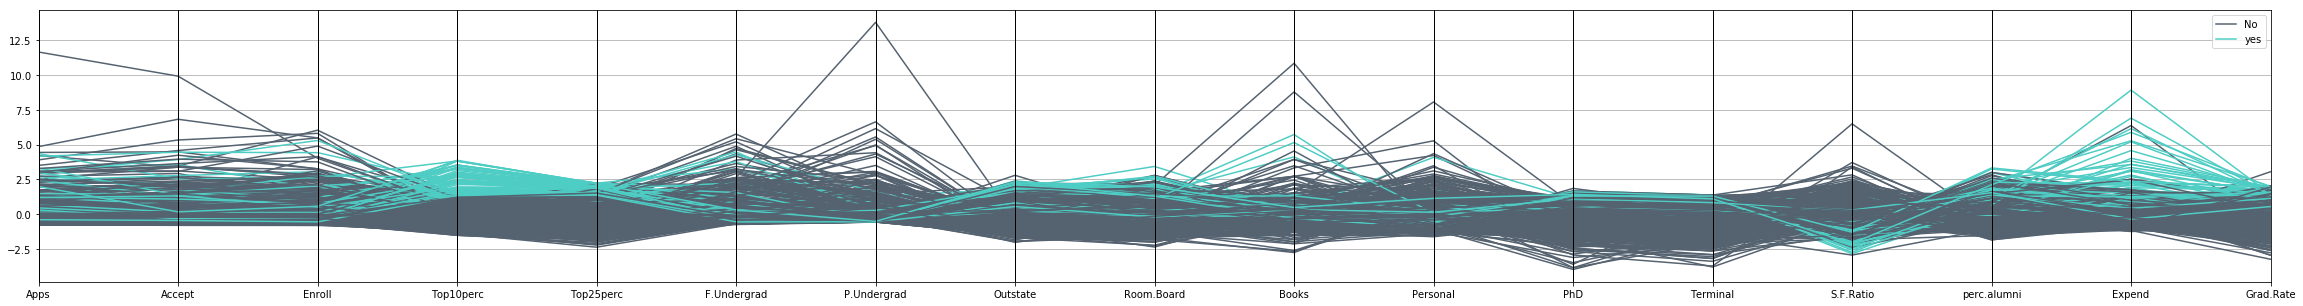

In [16]:
plt.figure(figsize = (40, 5))
parcor(X2.iloc[:, 1:], 'Elite', color = ('#556270', '#4ECDC4'))
plt.show()

In [17]:
from pandas.plotting import andrews_curves as adrcur

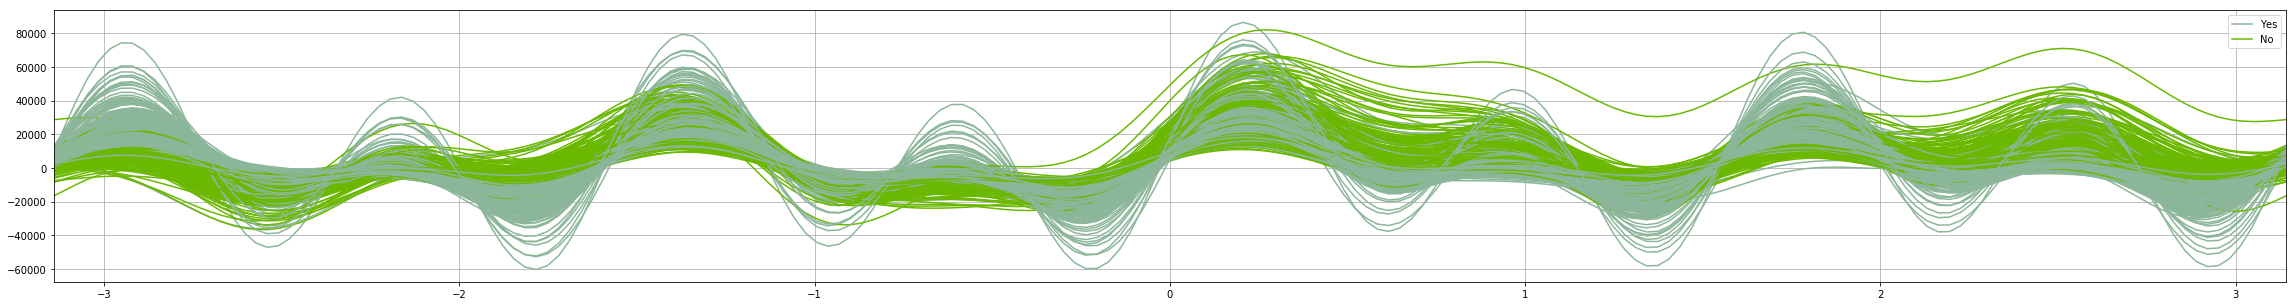

In [18]:
plt.figure(figsize = (40, 5))
adrcur(X.iloc[:, :-1], 'Private')
plt.show()

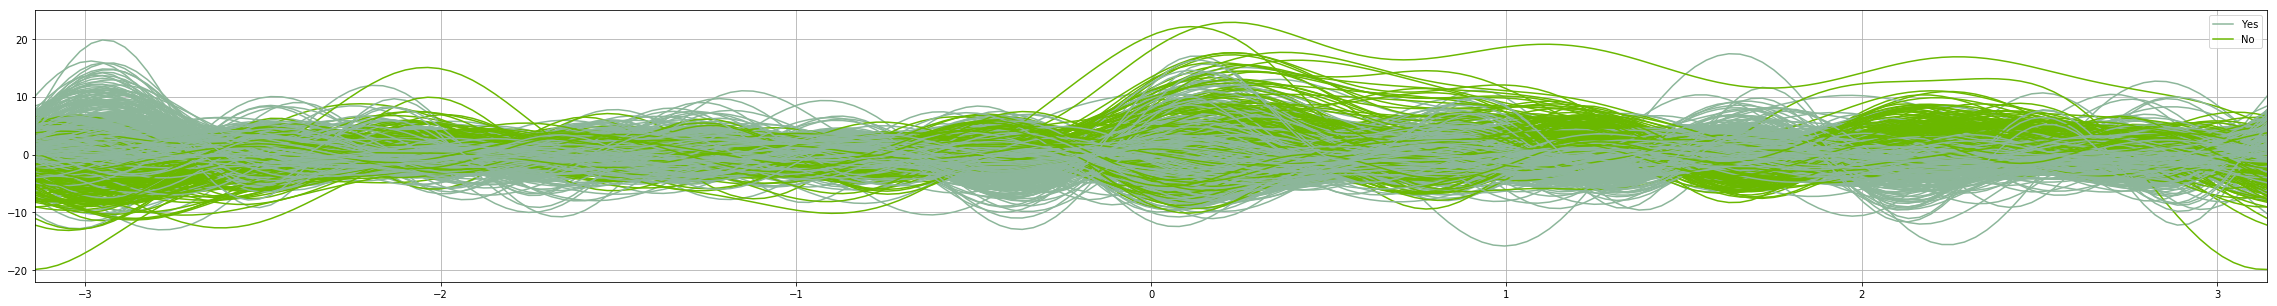

In [19]:
plt.figure(figsize = (40, 5))
adrcur(X2.iloc[:, :-1], 'Private')
plt.show()

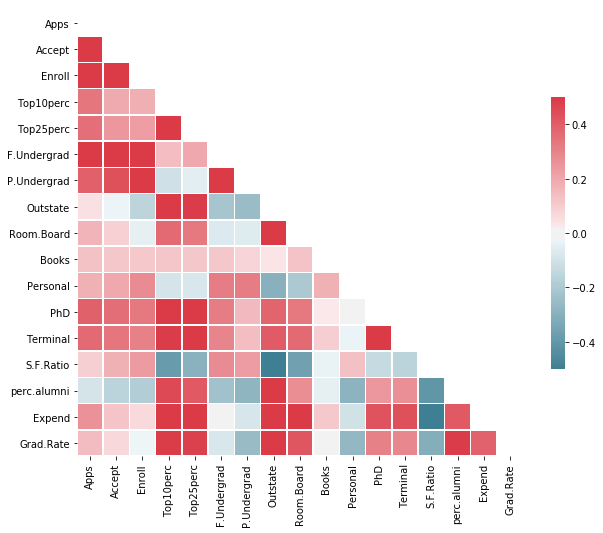

In [20]:
# the correlation removes the variance thus X2 / X makes no difference
Y = X.iloc[:, 1:-1].corr()
plt.figure(figsize = (10, 10))
# Generate a mask for the upper triangle
mask = np.zeros_like(Y, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(Y, mask=mask, cmap=cmap, vmax=.5, vmin = -.5, linewidths=.5, square=True, cbar_kws={"shrink": .5})
#                                                         white lines;                shorter colorbar

In [21]:
from sklearn.decomposition import PCA

In [22]:
pca = PCA(n_components = Ncol-2, svd_solver = 'full')
pca.fit(X.iloc[:, 1:-1])
PCA(copy = True, n_components = Ncol-2, whiten = False)
Y = pca.transform(X.iloc[:, 1:-1]) # these are the scores for each PC

In [23]:
pca2 = PCA(n_components = Ncol-2, svd_solver = 'full')
pca2.fit(X2.iloc[:, 1:-1])
PCA(copy = True, n_components = Ncol-2, whiten = False)
Y2 = pca2.transform(X2.iloc[:, 1:-1]) # these are the scores for each PC

Proportion of variation explained by 1st 3 PCs: 0.9380920378221298


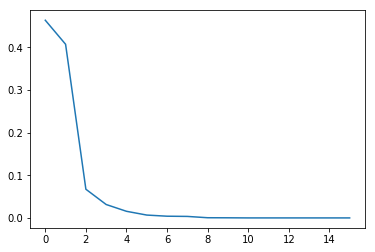

In [24]:
lamda = pca.explained_variance_ratio_
#print(lamda)
print('Proportion of variation explained by 1st 3 PCs:', sum(lamda[:3]))
plt.plot(lamda)
plt.show()

Proportion of variation explained by 1st 3 PCs: 0.6526175918920417


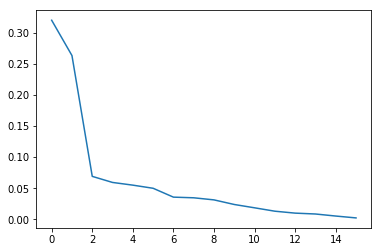

In [25]:
lamda2 = pca2.explained_variance_ratio_
#print(lamda)
print('Proportion of variation explained by 1st 3 PCs:', sum(lamda2[:3]))
plt.plot(lamda2)
plt.show()

In [26]:
# correlation between 1st 3 PCs and original features
corr0 = np.zeros((3, Ncol-2))
for j in range(1, Ncol-1):
    for i in range(3):
        aa = X.iloc[:, j].copy()
        bb = Y[:, i]
        corr0[i, j-1] = np.corrcoef(aa, bb)[0, 1]

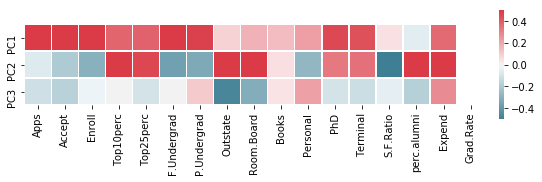

In [27]:
plt.figure(figsize = (10, 4))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr0, cmap=cmap, vmax=.5, vmin = -.5, linewidths=.5, square=True, cbar_kws={"shrink": .5},
            xticklabels = X.columns[1:-1], yticklabels = ['PC1', 'PC2', 'PC3'])

In [28]:
# correlation between 1st 3 PCs and original features
corr02 = np.zeros((3, Ncol-2))
for j in range(1, Ncol-1):
    for i in range(3):
        aa = X2.iloc[:, j].copy()
        bb = Y2[:, i]
        corr02[i, j-1] = np.corrcoef(aa, bb)[0, 1]

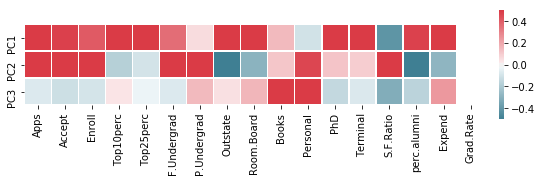

In [29]:
plt.figure(figsize = (10, 4))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr02, cmap=cmap, vmax=.5, vmin = -.5, linewidths=.5, square=True, cbar_kws={"shrink": .5},
            xticklabels = X.columns[1:-1], yticklabels = ['PC1', 'PC2', 'PC3'])

<Figure size 360x360 with 0 Axes>

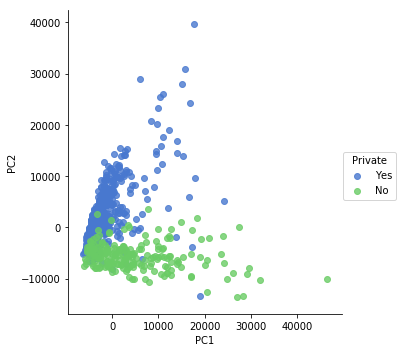

In [30]:
plt.figure(figsize = (5, 5))
Xplot = pd.concat([X.iloc[:, 0].reset_index(drop = True), 
                   pd.DataFrame(Y[:, :2], columns = ['PC1', 'PC2'])], axis = 1)
sns.lmplot(x = 'PC1', y = 'PC2', hue = X.columns[0], data = Xplot, fit_reg = False, palette = 'muted')

<Figure size 360x360 with 0 Axes>

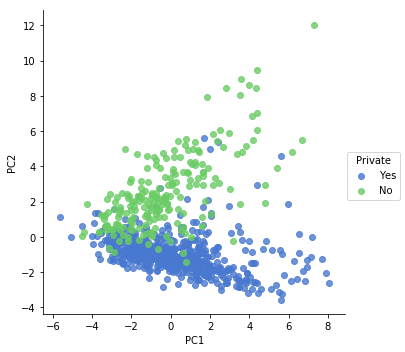

In [31]:
plt.figure(figsize = (5, 5))
Xplot = pd.concat([X2.iloc[:, 0].reset_index(drop = True), 
                   pd.DataFrame(Y2[:, :2], columns = ['PC1', 'PC2'])], axis = 1)
sns.lmplot(x = 'PC1', y = 'PC2', hue = X2.columns[0], data = Xplot, fit_reg = False, palette = 'muted')

See [seaborn palette options](https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette)

Additional plots added after referring to [Unofficial solution from PrinceHonest](https://raw.githubusercontent.com/asadoughi/stat-learning/master/ch2/applied.R)

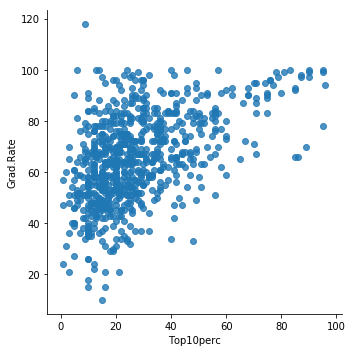

In [32]:
sns.lmplot(x = 'Top10perc', y = 'Grad.Rate', data = X, fit_reg = False)

In [33]:
X_acpRate = X['Accept'] / X['Apps']

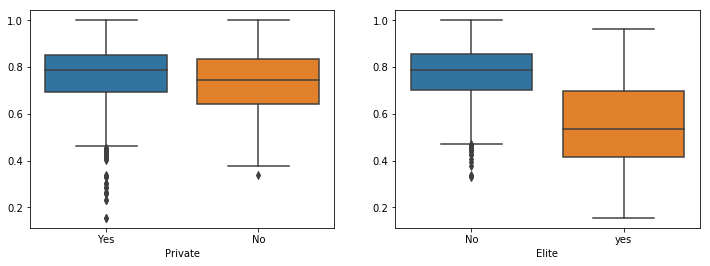

In [34]:
plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
sns.boxplot(x = X['Private'], y = X_acpRate)
plt.subplot(1, 2, 2)
sns.boxplot(x = X['Elite'], y = X_acpRate)

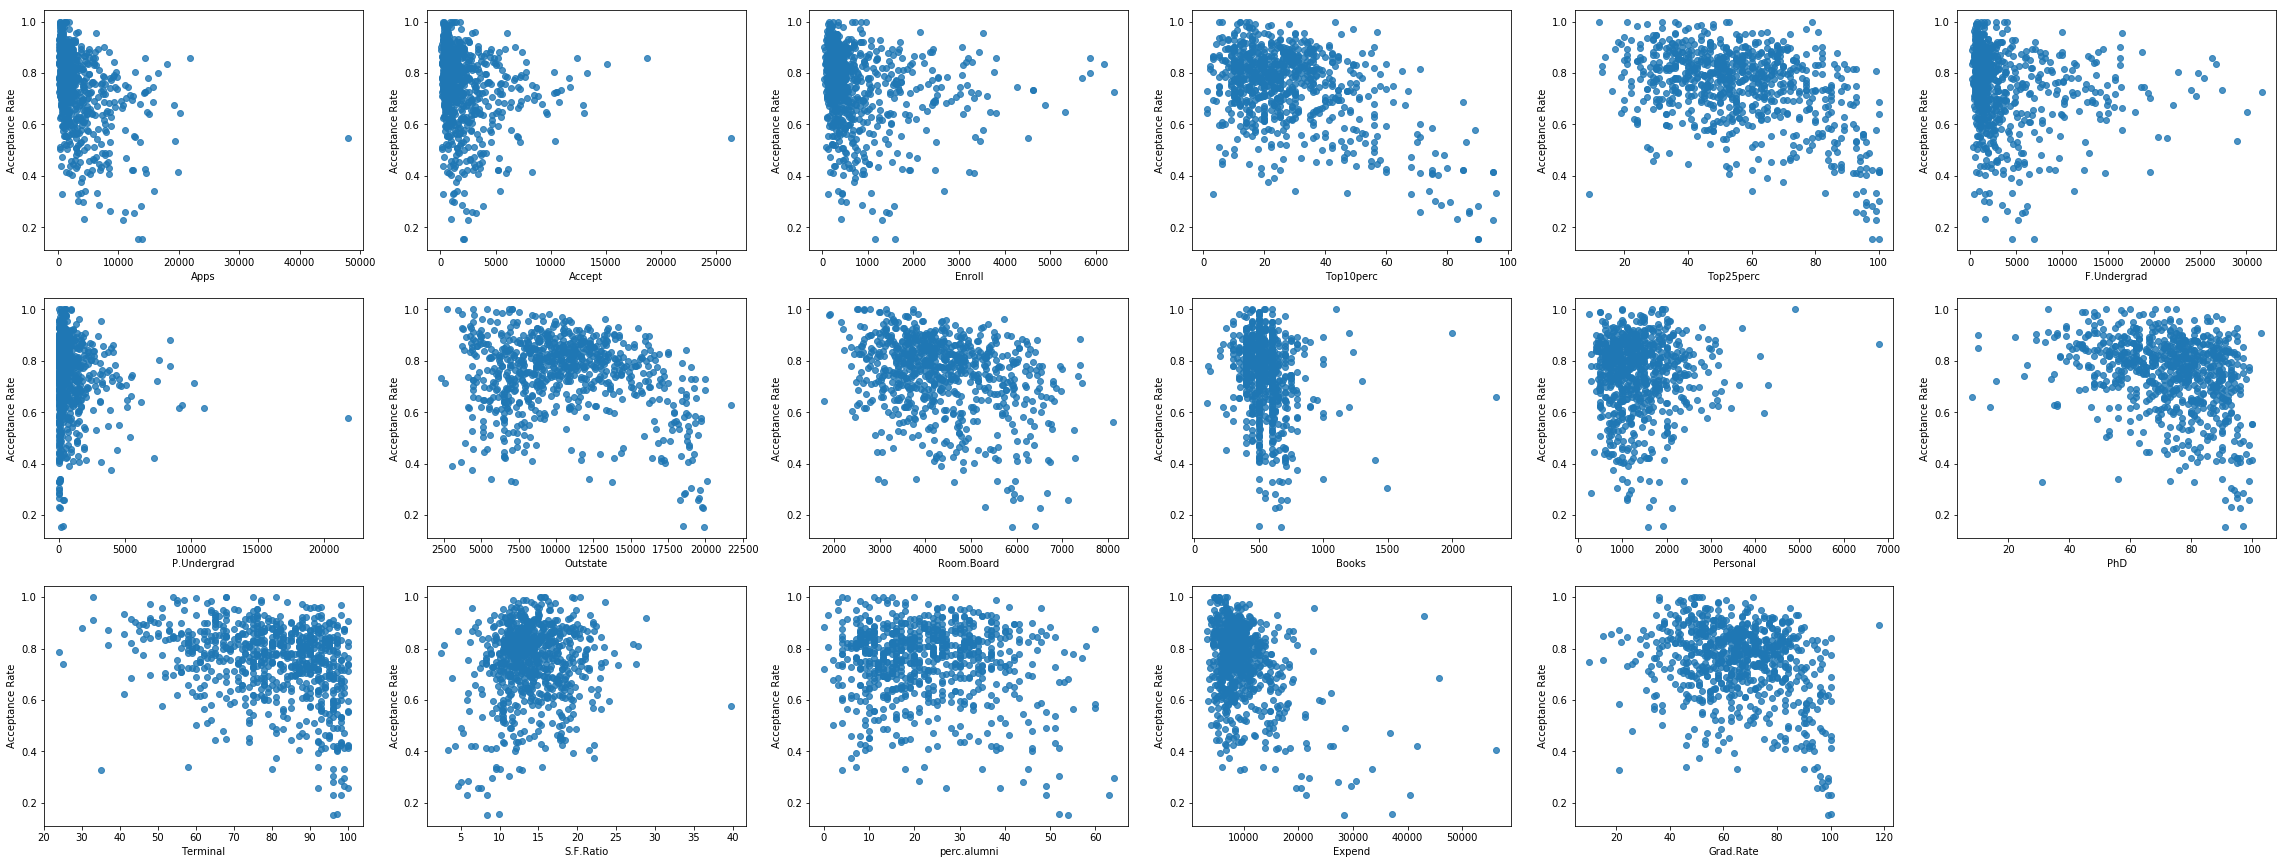

In [35]:
cnt = 0
plt.figure(figsize = (40, 15))
for icol in X.columns:
    if icol == 'Elite' or icol == 'Private': continue
    cnt += 1
    plt.subplot(3, 6, cnt)
    sns.regplot(x = X[icol], y = X_acpRate, fit_reg = False)
    plt.ylabel('Acceptance Rate')